<a href="https://colab.research.google.com/github/2020danielli/ODEs/blob/main/ODES_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

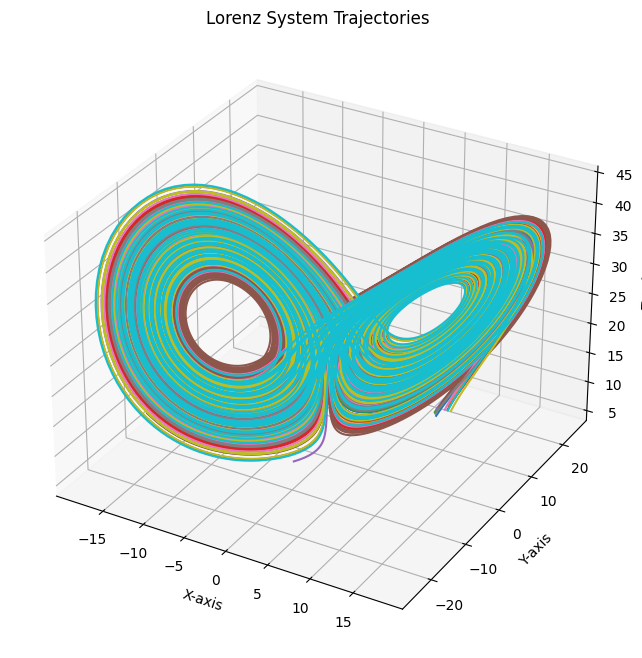

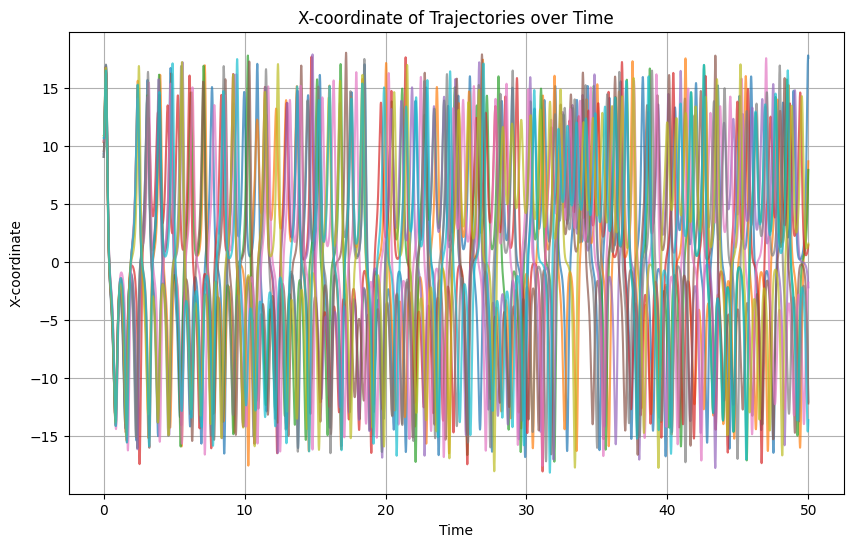

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lorenz system
def lorenz_system(t, xyz, sigma, rho, beta):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Define parameters
sigma = 10.0
rho = 28.0
beta = 8/3

# Set up initial conditions
num_trajectories = 10
initial_conditions = [
    [10 + np.random.uniform(-1, 1), 10 + np.random.uniform(-1, 1), 10 + np.random.uniform(-1, 1)]
    for _ in range(num_trajectories)
]

# Time span for simulation
t_span = (0, 50)
t_eval = np.linspace(*t_span, 10000)

# Solve the system for each initial condition
solutions = []
for init_cond in initial_conditions:
    sol = solve_ivp(lorenz_system, t_span, init_cond, args=(sigma, rho, beta), t_eval=t_eval)
    solutions.append(sol.y)

# Plot trajectories in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for sol in solutions:
    ax.plot(sol[0], sol[1], sol[2])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Lorenz System Trajectories')

plt.show()

# Plot x-coordinate of a trajectory over time
plt.figure(figsize=(10, 6))
for sol in solutions:
    plt.plot(t_eval, sol[0], alpha=0.7)

plt.xlabel('Time')
plt.ylabel('X-coordinate')
plt.title('X-coordinate of Trajectories over Time')
plt.grid(True)
plt.show()


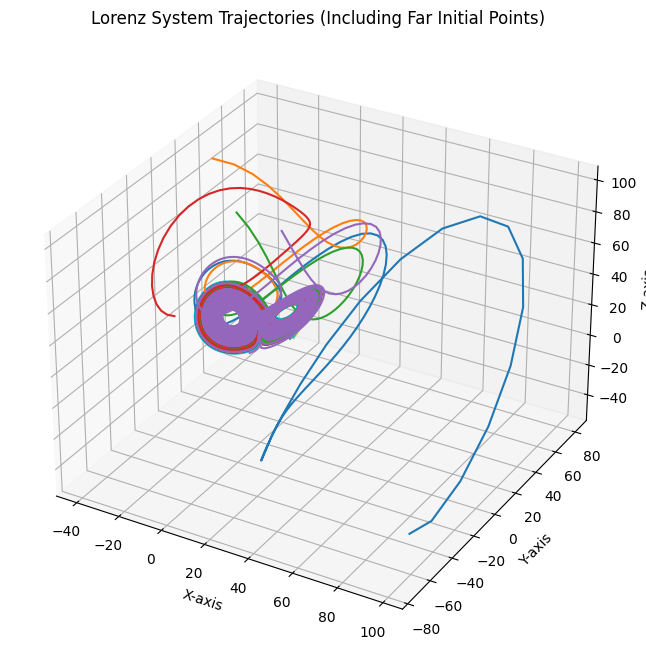

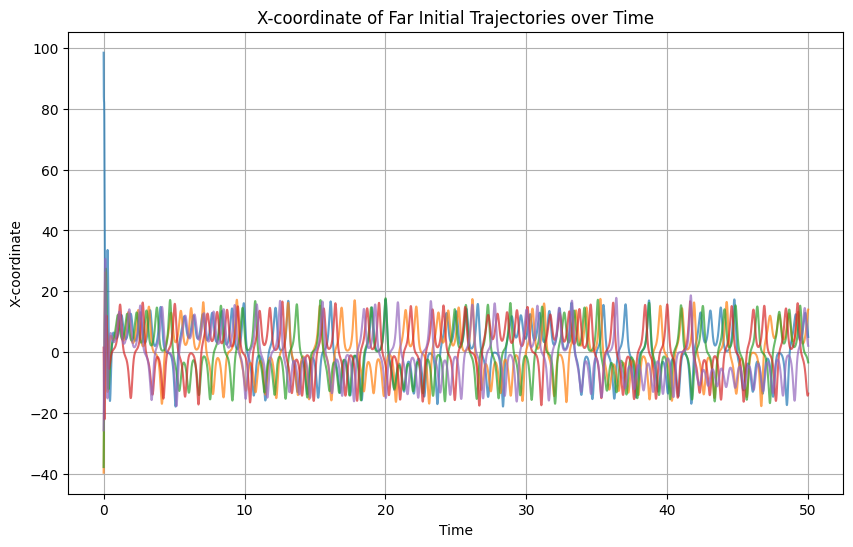

In [5]:
# Generate points with large initial coordinates
num_far_points = 5
far_initial_conditions = [
    [100 * np.random.uniform(-1, 1), 100 * np.random.uniform(-1, 1), 100 * np.random.uniform(-1, 1)]
    for _ in range(num_far_points)
]

# Combine far points with previously generated initial conditions
all_initial_conditions = initial_conditions + far_initial_conditions

# Solve the system for all initial conditions
all_solutions = []
for init_cond in all_initial_conditions:
    sol = solve_ivp(lorenz_system, t_span, init_cond, args=(sigma, rho, beta), t_eval=t_eval)
    all_solutions.append(sol.y)

# Plot all trajectories in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for sol in all_solutions:
    ax.plot(sol[0], sol[1], sol[2])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Lorenz System Trajectories (Including Far Initial Points)')

plt.show()

# Plot x-coordinate of trajectories over time (far initial conditions)
plt.figure(figsize=(10, 6))
for idx in range(num_trajectories, num_trajectories + num_far_points):
    plt.plot(t_eval, all_solutions[idx][0], alpha=0.7)

plt.xlabel('Time')
plt.ylabel('X-coordinate')
plt.title('X-coordinate of Far Initial Trajectories over Time')
plt.grid(True)
plt.show()
